# Correlation Matrix Tutorial with Python
## by Sachnaz Desta Oktarina, PhD
**Indonesian Oil Palm Research Institute, 11 December 2019**

When we are going to find relationship among imputed variables, one might consider correlation matrix. It is everyone's favorite panacea due to its functionality to reveal association towards multiple indicators. To date, `Phyton` has become one of the most used statistical softwares to perform such analysis. In this article, the author attempted to demonstrate a tutorial on how to perform the basic matrix correlation using `Phyton`. This is the very novice tutorial, thus one without any programming knowledges may easily follow all through the end of the document. Enjoy the tutorial :) 

# 1. Activate the necessary libraries
`pandas` is a library that support data manipulation and analysis within `Python` environment, while `matplotplit` is a library that facilitates in creating graphical representation of a set of data. In order to make the plot look fancy and nicely, one might employ `seaborn` library as well. Hit `Shift + Enter` for `Mac` user to run the following cell from your keyboard, or simply click `Run` from the upper toolbar.


In [93]:
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
import seaborn as sns
from scipy.sparse import csr_matrix      # sparse matrices

%config InlineBackend.figure_format = "retina" #for having better resolution graph
%matplotlib inline 

Without any further due, one might call the data that is going to be used. Here, the author simply make use of `github` free source data.

## 2. Declare the data of your interest

In [94]:
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

To investigate how the dataframe is looked like, please type `nameofdataframe.head()` on the console/ cell.

In [95]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## 3. Inspect the data frame structures

We can also dig deeper down to the detail of data frame structure by imposing `dataframe.info()`. Furthermore to inspect the basic summary of the whole set of data, please hit the cell written with  `dataframe.describe()`. This is equivalent with writing `str()` and `describe()` function in `R`
.

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 symboling           201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-nu

the data type nomenclature in `Python` is quite different with that in `R`. `int64` denotes discrete variables while `object` marks nominal variable. subsequently `float64` indicates continues variables.

In [99]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## 4. Construct the correlation matrix

Finally we can create matrix correlation with heatmap design by employing the following code. (The author partially cloned a piece of __[Drazen Zaric's](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)__ brilliant work).

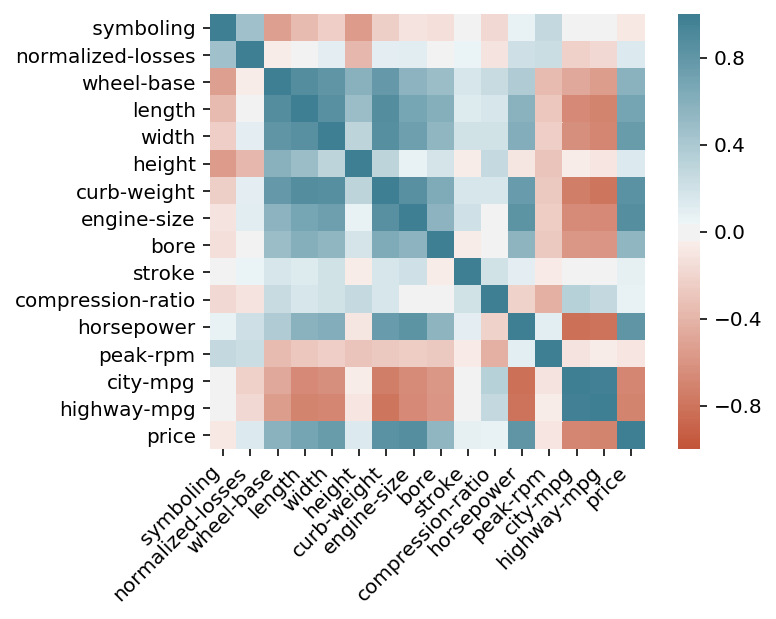

In [88]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

To obtain the value of correlation of overall variables, one might put syntax `print(corr)`. The syntax will return the exact value of all numerical variables. 

In [102]:
print(corr)

                    symboling  normalized-losses  wheel-base    length  \
 symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses    0.466264           1.000000   -0.056661  0.019424   
wheel-base          -0.535987          -0.056661    1.000000  0.876024   
length              -0.365404           0.019424    0.876024  1.000000   
width               -0.242423           0.086802    0.814507  0.857170   
height              -0.550160          -0.373737    0.590742  0.492063   
curb-weight         -0.233118           0.099404    0.782097  0.880665   
engine-size         -0.110581           0.112360    0.572027  0.685025   
bore                -0.140019          -0.029862    0.493244  0.608971   
stroke              -0.008153           0.055045    0.158018  0.123952   
compression-ratio   -0.182196          -0.114713    0.250313  0.159733   
horsepower           0.075819           0.217299    0.371147  0.579821   
peak-rpm             0.279740         

This is the end of the document. This chunk of code might be reproducible with any other data of your interest. The author still open a room for improvement and should you have any suggestion, question, or comments, drop your inquiries to `sachnazdes@gmail.com`. Many thanks in a bunch!